## Jakub Szczypek

## Sprawozdanie z Uczenia Maszynowego - Regularyzacja

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [2]:
print(raw_df.keys())
print(data.shape)
print(raw_df.describe())

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')
(506, 13)
                0            1            2           3           4   \
count  1012.000000  1012.000000  1012.000000  506.000000  506.000000   
mean    180.143778    12.008350    16.834792    0.069170    0.554695   
std     188.132839    17.250728     9.912616    0.253994    0.115878   
min       0.006320     0.000000     0.460000    0.000000    0.385000   
25%       0.257830     0.000000     8.375000    0.000000    0.449000   
50%      24.021000     7.240000    18.100000    0.000000    0.538000   
75%     391.435000    16.780000    21.890000    0.000000    0.624000   
max     396.900000   100.000000    50.000000    1.000000    0.871000   

               5           6           7           8           9           10  
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534  
std      0.702617   28.148861    2.1057

**Ex 1. Podział zbioru na uczący i testowy**

In [3]:
X = data
y = target

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
x_train_std = scaler.transform(X_train)
x_test_std = scaler.transform(X_test)

**Ex 2. Regresja liniowa**

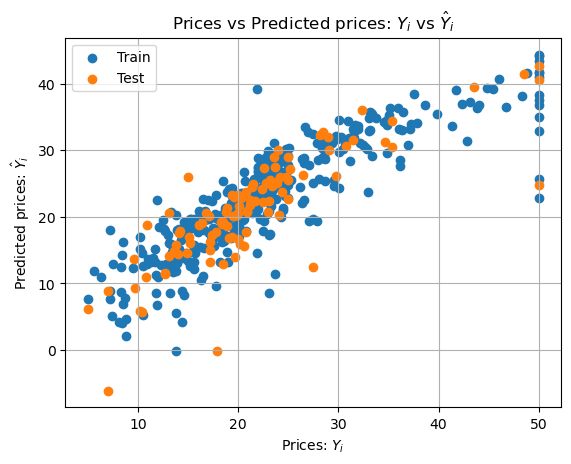

In [6]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(x_train_std, y_train)
y_predicted = regr.predict(x_test_std)
y_train_pred = regr.predict(x_train_std)

plt.scatter(y_train, y_train_pred)
plt.scatter(y_test, y_predicted)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.grid()
plt.legend(['Train','Test'])
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

**Ex 3. Proszę policzyć Mean Squared Error dla predykcji na zbiorze testowym.**

**Ex4. Proszę zweryfikować model.score (Opis metryki dostępny jest w dokumentacji).
Powyższe metryki będą przydatne do porównania tego modelu z kolejnymi.**

In [7]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(y_test, y_predicted)
print("Residual sum of squares: {}".format(error))

Residual sum of squares: 24.291119474973527


In [8]:
score = regr.score(x_test_std, y_test)
print("Score: {}".format(score))

Score: 0.6687594935356318


In [9]:
from sklearn.preprocessing import PolynomialFeatures
 
polynomial_features = PolynomialFeatures(degree=2)
polynomial_features

PolynomialFeatures()

In [10]:
X_train_trans = polynomial_features.fit_transform(x_train_std)
X_test_trans = polynomial_features.transform(x_test_std)


modelPoly = LinearRegression()
modelPoly.fit(X_train_trans, y_train)
y_pred_poly = modelPoly.predict(X_test_trans)
y_pred_train_poly = modelPoly.predict(X_train_trans)

In [11]:
error = mean_squared_error(y_test,y_pred_poly)
print("Residual sum of squares: {}".format(error))

error2 = mean_squared_error(y_train,y_pred_train_poly)
print("Residual sum of squares: {}".format(error2))

Residual sum of squares: 14.176037102592927
Residual sum of squares: 5.135728380014696


In [12]:
modelPoly.score(X_test_trans,y_test)

0.806691588901105

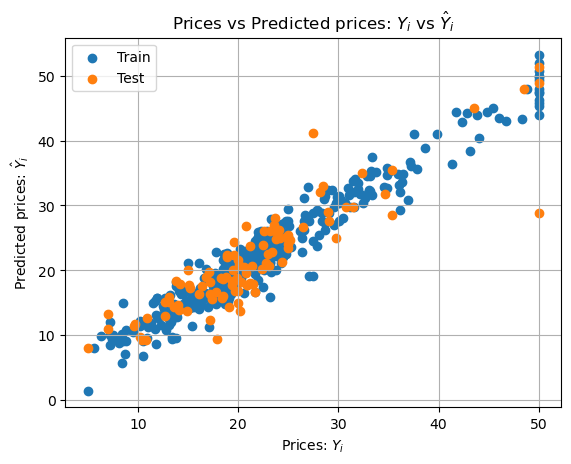

In [13]:
plt.scatter(y_train, y_pred_train_poly)
plt.scatter(y_test, y_pred_poly)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.grid()
plt.legend(['Train','Test'])
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

**Ex.5 Lasso**

In [14]:
from sklearn import linear_model
model = linear_model.Lasso(alpha=0.001)
model.fit(X_train_trans, y_train)
y_pred_lasso = model.predict(X_test_trans)
y_pred_train_lasso = model.predict(X_train_trans)

error = mean_squared_error(y_test, y_pred_lasso)
error2 = mean_squared_error(y_train, y_pred_train_lasso)
score = model.score(X_test_trans, y_test)

print("For alpha = 0.001:\nResidual sum of squares: {}\nmodel.score = {}".format(error, score))

For alpha = 0.001:
Residual sum of squares: 13.89010784900549
model.score = 0.8105906002607446


C:\Users\szczy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.784e+02, tolerance: 3.510e+00
  model = cd_fast.enet_coordinate_descent(


In [15]:
model = linear_model.Lasso(alpha=0.01)
model.fit(X_train_trans, y_train)
y_pred_lasso = model.predict(X_test_trans)
y_pred_train_lasso = model.predict(X_train_trans)

error = mean_squared_error(y_test, y_pred_lasso)
error2 = mean_squared_error(y_train, y_pred_train_lasso)
score = model.score(X_test_trans, y_test)

print("For alpha = 0.01:\nResidual sum of squares: {}\nmodel.score = {}".format(error, score))

For alpha = 0.01:
Residual sum of squares: 13.65094666099213
model.score = 0.8138518691835616


In [16]:
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train_trans, y_train)
y_pred_lasso = model.predict(X_test_trans)
y_pred_train_lasso = model.predict(X_train_trans)

error = mean_squared_error(y_test, y_pred_lasso)
error2 = mean_squared_error(y_train, y_pred_train_lasso)
score = model.score(X_test_trans, y_test)

print("For alpha = 0.1:\nResidual sum of squares: {}\nmodel.score = {}".format(error, score))

For alpha = 0.1:
Residual sum of squares: 13.770851458060045
model.score = 0.812216813798436


In [17]:
model = linear_model.Lasso(alpha=1)
model.fit(X_train_trans, y_train)
y_pred_lasso = model.predict(X_test_trans)
y_pred_train_lasso = model.predict(X_train_trans)

error = mean_squared_error(y_test, y_pred_lasso)
error2 = mean_squared_error(y_train, y_pred_train_lasso)
score = model.score(X_test_trans, y_test)

print("For alpha = 1:\nResidual sum of squares: {}\nmodel.score = {}".format(error, score))

For alpha = 1:
Residual sum of squares: 19.633194797692106
model.score = 0.7322762586137164


In [18]:
model = linear_model.Lasso(alpha=10)
model.fit(X_train_trans, y_train)
y_pred_lasso = model.predict(X_test_trans)
y_pred_train_lasso = model.predict(X_train_trans)

error = mean_squared_error(y_test, y_pred_lasso)
error2 = mean_squared_error(y_train, y_pred_train_lasso)
score = model.score(X_test_trans, y_test)

print("For alpha = 10:\nResidual sum of squares: {}\nmodel.score = {}".format(error, score))

For alpha = 10:
Residual sum of squares: 74.66499856216274
model.score = -0.018152825948301032


**Jak możemy zauważyć najlepszy model score oraz najmniejsze mse otrzymaliśmy dla alphy = 0.01**

C:\Users\szczy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.784e+02, tolerance: 3.510e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\szczy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.603e+00, tolerance: 3.510e+00
  model = cd_fast.enet_coordinate_descent(


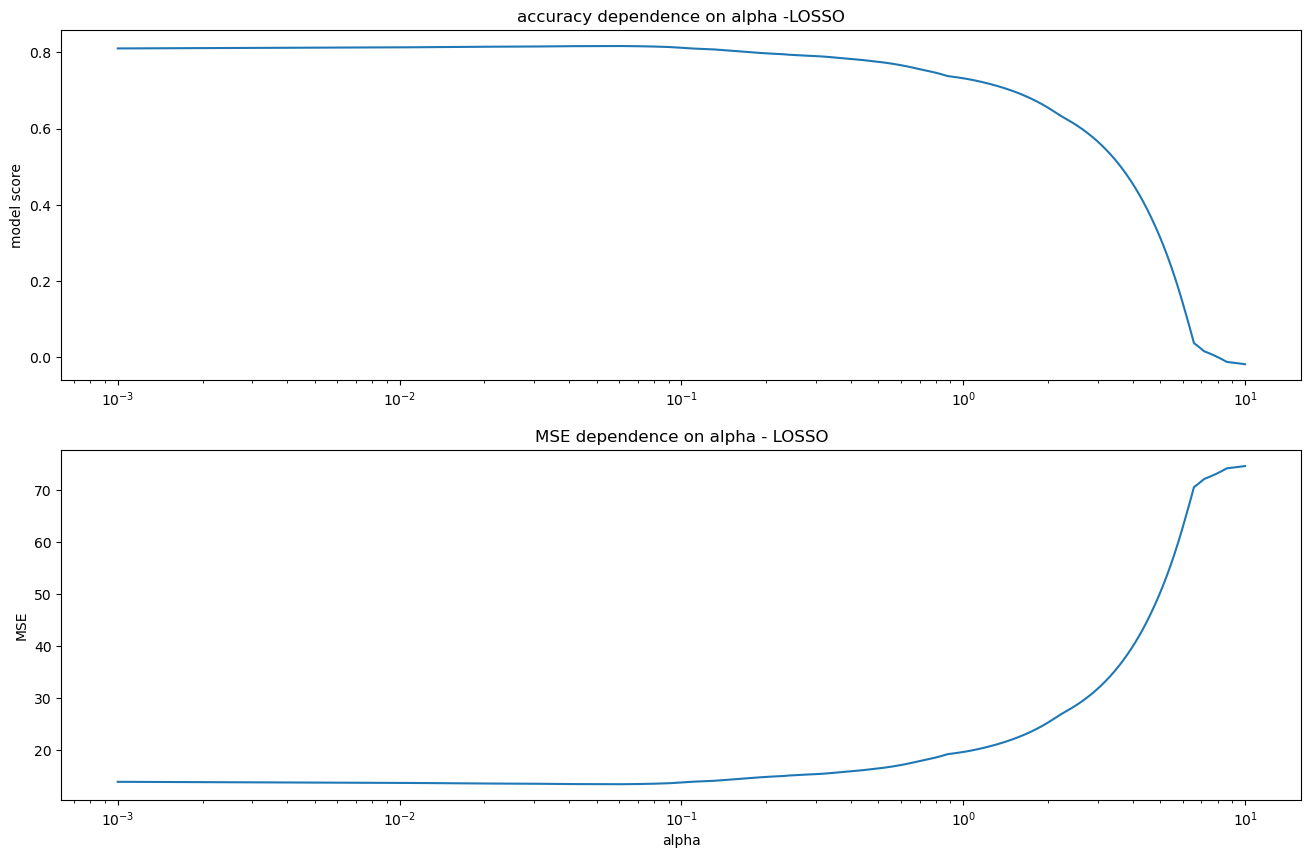

In [19]:
alpha_tab = np.linspace(0.001, 10, 1000)
score_tab = []
score_train_tab =[]
error_tab = []


for alpha in alpha_tab:
    model = linear_model.Lasso(alpha = alpha)
    model.fit(X_train_trans, y_train)
    y_pred_lasso = model.predict(X_test_trans)
    error = mean_squared_error(y_test, y_pred_lasso)
    score = model.score(X_test_trans, y_test)
    score_train = model.score(X_train_trans, y_train)
    score_tab.append(score)
    score_train_tab.append(score_train)
    error_tab.append(error)
    
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(alpha_tab, score_tab)
fig.set_size_inches(16,10)
ax1.set_title("accuracy dependence on alpha -LOSSO")
ax1.set_ylabel('model score')
ax1.set_xscale('log')
ax2.plot(alpha_tab, error_tab)
ax2.set_title("MSE dependence on alpha - LOSSO")
ax2.set_ylabel('MSE')
ax2.set_xlabel('alpha')
ax2.set_xscale('log')

**Ex6. Ridge**

In [20]:
model = linear_model.Ridge(alpha=0.001)
model.fit(X_train_trans, y_train)
y_pred_ridge = model.predict(X_test_trans)
y_pred_train_ridge = model.predict(X_train_trans)

error = mean_squared_error(y_test, y_pred_ridge)
error2 = mean_squared_error(y_train, y_pred_train_ridge)
score = model.score(X_test_trans, y_test)

print("For alpha = 0.001:\nResidual sum of squares: {}\nmodel.score = {}".format(error, score))

For alpha = 0.001:
Residual sum of squares: 14.235858554665784
model.score = 0.8058758468311498


In [21]:
model = linear_model.Ridge(alpha=0.01)
model.fit(X_train_trans, y_train)
y_pred_ridge = model.predict(X_test_trans)
y_pred_train_ridge = model.predict(X_train_trans)

error = mean_squared_error(y_test, y_pred_ridge)
error2 = mean_squared_error(y_train, y_pred_train_ridge)
score = model.score(X_test_trans, y_test)

print("For alpha = 0.01:\nResidual sum of squares: {}\nmodel.score = {}".format(error, score))

For alpha = 0.01:
Residual sum of squares: 14.183569738924726
model.score = 0.8065888717630115


In [22]:
model = linear_model.Ridge(alpha=0.1)
model.fit(X_train_trans, y_train)
y_pred_ridge = model.predict(X_test_trans)
y_pred_train_ridge = model.predict(X_train_trans)

error = mean_squared_error(y_test, y_pred_ridge)
error2 = mean_squared_error(y_train, y_pred_train_ridge)
score = model.score(X_test_trans, y_test)

print("For alpha = 0.1:\nResidual sum of squares: {}\nmodel.score = {}".format(error, score))

For alpha = 0.1:
Residual sum of squares: 13.90962696198776
model.score = 0.8103244321709353


In [23]:
model = linear_model.Ridge(alpha=1)
model.fit(X_train_trans, y_train)
y_pred_ridge = model.predict(X_test_trans)
y_pred_train_ridge = model.predict(X_train_trans)

error = mean_squared_error(y_test, y_pred_ridge)
error2 = mean_squared_error(y_train, y_pred_train_ridge)
score = model.score(X_test_trans, y_test)

print("For alpha = 1:\nResidual sum of squares: {}\nmodel.score = {}".format(error, score))

For alpha = 1:
Residual sum of squares: 13.471790040492422
model.score = 0.8162948990230018


In [24]:
model = linear_model.Ridge(alpha=10)
model.fit(X_train_trans, y_train)
y_pred_ridge = model.predict(X_test_trans)
y_pred_train_ridge = model.predict(X_train_trans)

error = mean_squared_error(y_test, y_pred_ridge)
error2 = mean_squared_error(y_train, y_pred_train_ridge)
score = model.score(X_test_trans, y_test)

print("For alpha = 10:\nResidual sum of squares: {}\nmodel.score = {}".format(error, score))

For alpha = 10:
Residual sum of squares: 13.343332081102195
model.score = 0.8180465877243659


**Jak możemy zauważyć najlepszy model score oraz najmniejsze mse otrzymaliśmy dla alphy = 10**

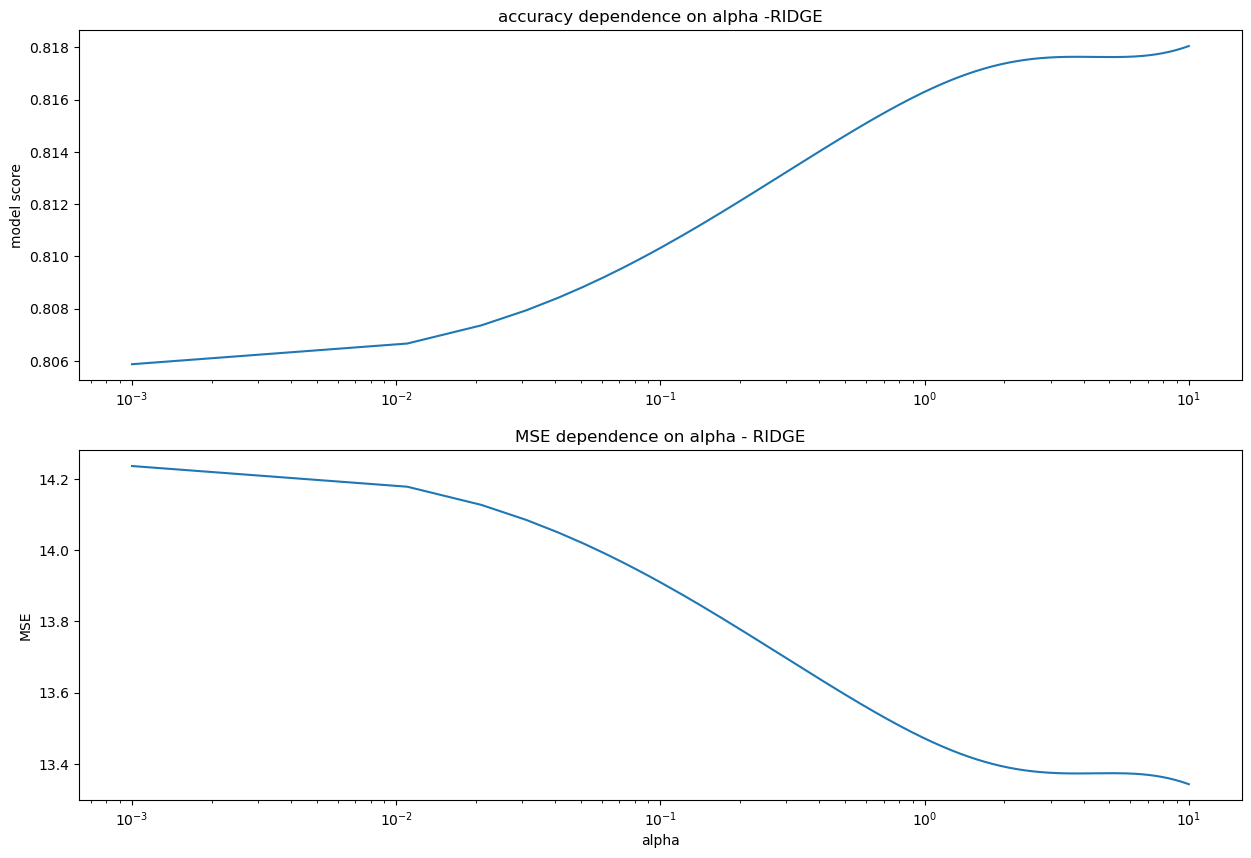

In [25]:
alpha_tab = np.linspace(0.001, 10, 1000)
score_tab = []
score_train_tab =[]
error_tab = []


for alpha in alpha_tab:
    model = linear_model.Ridge(alpha = alpha)
    model.fit(X_train_trans, y_train)
    y_pred_ridge = model.predict(X_test_trans)
    error = mean_squared_error(y_test, y_pred_ridge)
    score = model.score(X_test_trans, y_test)
    score_train = model.score(X_train_trans, y_train)
    score_tab.append(score)
    score_train_tab.append(score_train)
    error_tab.append(error)
    
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(15,10)
ax1.plot(alpha_tab, score_tab)
ax1.set_title("accuracy dependence on alpha -RIDGE")
ax1.set_ylabel('model score')
ax1.set_xscale('log')
ax2.plot(alpha_tab, error_tab)
ax2.set_title("MSE dependence on alpha - RIDGE")
ax2.set_ylabel('MSE')
ax2.set_xlabel('alpha')
ax2.set_xscale('log')

## Regularyzacja dla Regresji Logistycznej

**Wykonuje ćwiczenie A**

In [26]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
 
y = data.target
X = data.data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(penalty='l2',solver='newton-cg',max_iter=200)
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)
lreg.score(X_test, y_test)

0.956140350877193

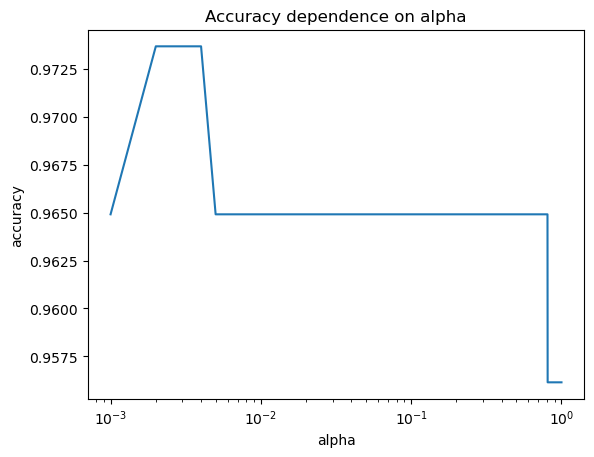

In [34]:
alpha_tab = np.linspace(0.001, 1, 1000)
accuracy_tab = []
for alpha in alpha_tab:
    lreg = LogisticRegression(penalty='l2',C = alpha,solver='newton-cg',max_iter=200)
    lreg.fit(X_train, y_train)
    y_pred = lreg.predict(X_test)
    accuracy = lreg.score(X_test, y_test)
    accuracy_tab.append(accuracy)
    
plt.plot(alpha_tab, accuracy_tab)
plt.title('Accuracy dependence on alpha')
plt.ylabel('accuracy')
plt.xlabel('alpha')
plt.xscale('log')